In [19]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
url = "https://sharehubnepal.com/data/api/v1/candle-chart/history?symbol=CIT&resolution=1D&countback=0&isAdjust=true"

In [21]:
response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data)

In [22]:
df

,success,code,message,data
0,True,SUCCESS,Fetched Successfully,"{'time': 1325376000000, 'symbol': 'CIT', 'open..."
1,True,SUCCESS,Fetched Successfully,"{'time': 1325980800000, 'symbol': 'CIT', 'open..."
2,True,SUCCESS,Fetched Successfully,"{'time': 1326067200000, 'symbol': 'CIT', 'open..."
3,True,SUCCESS,Fetched Successfully,"{'time': 1326153600000, 'symbol': 'CIT', 'open..."
4,True,SUCCESS,Fetched Successfully,"{'time': 1327276800000, 'symbol': 'CIT', 'open..."
...,...,...,...,...
2771,True,SUCCESS,Fetched Successfully,"{'time': 1753228800000, 'symbol': 'CIT', 'open..."
2772,True,SUCCESS,Fetched Successfully,"{'time': 1753315200000, 'symbol': 'CIT', 'open..."
2773,True,SUCCESS,Fetched Successfully,"{'time': 1753574400000, 'symbol': 'CIT', 'open..."
2774,True,SUCCESS,Fetched Successfully,"{'time': 1753660800000, 'symbol': 'CIT', 'open..."


In [23]:
data_expanded = pd.json_normalize(df['data'])
data_expanded['time' ] = pd.to_datetime(data_expanded['time'], unit = 'ms')
data_expanded = data_expanded.sort_values('time')

In [24]:
data_expanded

,time,symbol,open,close,high,low,volume
0,2012-01-01,CIT,33.26,33.04,33.04,33.04,50
1,2012-01-08,CIT,33.04,33.49,33.73,33.26,107
2,2012-01-09,CIT,33.49,33.73,33.73,33.73,12
3,2012-01-10,CIT,33.73,34.10,34.10,33.86,40
4,2012-01-23,CIT,34.10,34.60,34.84,34.33,127
...,...,...,...,...,...,...,...
2771,2025-07-23,CIT,2040.00,2050.55,2081.00,2030.00,36364
2772,2025-07-24,CIT,2079.00,2048.82,2079.00,2039.00,28057
2773,2025-07-27,CIT,2089.70,2068.45,2130.00,2056.00,54435
2774,2025-07-28,CIT,2068.00,2041.54,2070.00,2020.00,36874


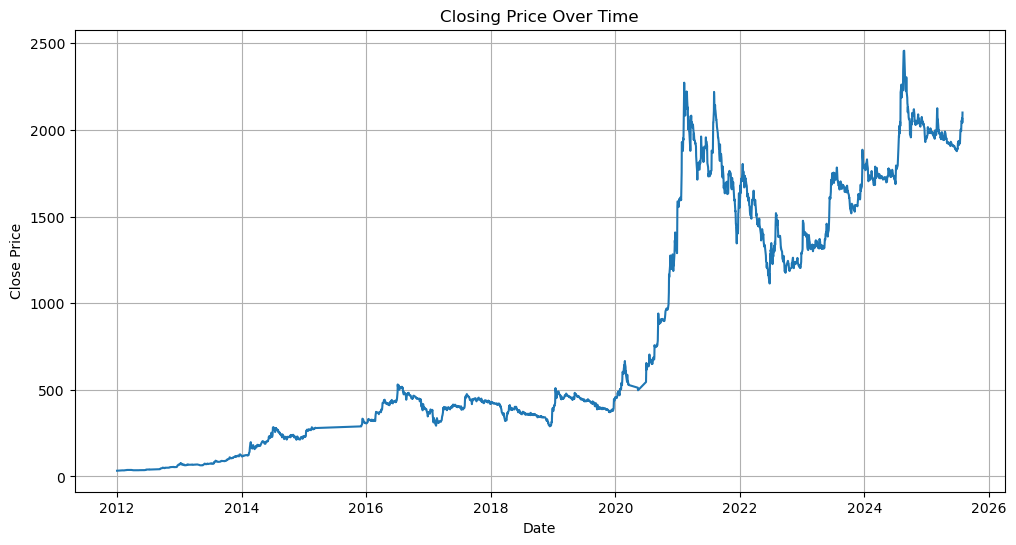

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(data_expanded['time'], data_expanded['close'])
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()